In [6]:
import pandas as pd

pizza = {'diameter': [6, 8, 10, 14, 18],
         'harga': [7, 9, 13, 17.5, 18]}

pizza_df = pd.DataFrame(pizza)
pizza_df 

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


<function matplotlib.pyplot.show(close=None, block=None)>

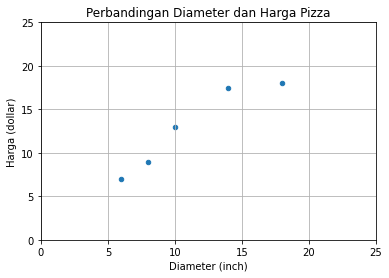

In [10]:
import matplotlib.pyplot as plt

pizza_df.plot(kind='scatter', x='diameter', y='harga')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show

In [13]:
import numpy as np

x = np.array(pizza_df['diameter'])
y = np.array(pizza_df['harga'])

print(f'x: {x}')
print(f'y: {y}')



x: [ 6  8 10 14 18]
y: [ 7.   9.  13.  17.5 18. ]


In [16]:
x = x.reshape(-1, 1)
x.shape

(5, 1)

In [17]:
x

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]], dtype=int64)

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [19]:
x_vis = np.array([0, 25]).reshape(-1,1)
y_vis = model.predict(x_vis)

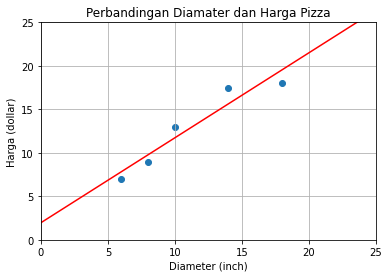

In [20]:
plt.scatter(x,y)
plt.plot(x_vis, y_vis, '-r')

plt.title('Perbandingan Diamater dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

In [22]:
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')


intercept: 1.965517241379315
slope: [0.9762931]


In [25]:
print(f'x:\n{x}\n')
print(f'x flatten: {x.flatten()}\n')
print(f'y {y}') 

x:
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

x flatten: [ 6  8 10 14 18]

y [ 7.   9.  13.  17.5 18. ]


In [26]:
variance_x = np.var(x.flatten(), ddof=1)

print(f'variance: {variance_x}')

variance: 23.2


In [27]:
np.cov(x.flatten(),y)


array([[23.2 , 22.65],
       [22.65, 24.3 ]])

In [28]:
covariance_xy = np.cov(x.flatten(),y)[0][1]

print(f'covariance: {covariance_xy}')

covariance: 22.650000000000002


In [29]:
slope = covariance_xy / variance_x

print(f'slope: {slope}')

slope: 0.976293103448276


In [30]:
intercept = np.mean(y) - slope * np.mean(x)
print(f'intercept: {intercept}')

intercept: 1.9655172413793096


In [31]:
diameter_pizza = np.array([12, 20, 23]).reshape(-1,1)
diameter_pizza

array([[12],
       [20],
       [23]])

In [33]:
prediksi_harga = model.predict(diameter_pizza)
prediksi_harga

array([13.68103448, 21.49137931, 24.42025862])

In [35]:
for dmtr, hrg in zip(diameter_pizza, prediksi_harga):
    print(f'Diameter: {dmtr} prediksi harga: {hrg}')

Diameter: [12] prediksi harga: 13.681034482758621
Diameter: [20] prediksi harga: 21.491379310344826
Diameter: [23] prediksi harga: 24.42025862068965


In [39]:
x_train = np.array([6, 8, 10, 14, 18]).reshape(-1,1)
y_train = np.array([7, 9, 13, 17.5, 18])

x_test=np.array([8,9,11,16,12]).reshape(-1,1)
y_test=np.array([11,8.5,15,18,11])


In [40]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [41]:
from sklearn.metrics import r2_score

y_pred = model.predict(x_test)
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

R-squared: 0.6620052929422553


In [44]:
ss_res = sum([(y_i - model.predict(x_i.reshape(-1,1))[0])**2
              for x_i , y_i in zip(x_test, y_test)])

print (f'ss_res: {ss_res}')

ss_res: 19.1980993608799


In [46]:
mean_y = np.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test])

print(f'ss_tot:{ss_tot}')


ss_tot:56.8


In [48]:
r_squared = 1 - (ss_res/ss_tot)

print(f'R-squared: {r_squared}')

R-squared: 0.6620052929422553
